Gini accuracy 0.9166666666666666
Entropy accuracy 0.9166666666666666
Max depth accuracy 0.6666666666666666


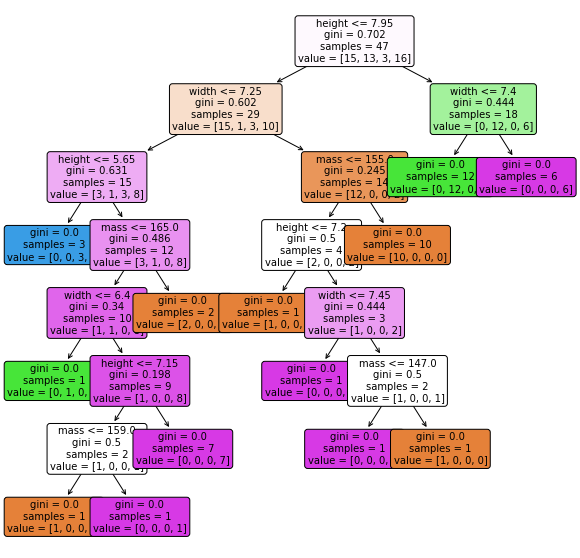

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

from matplotlib import pyplot as plt
from sklearn import tree

from math import sqrt

data = pd.read_csv("fruit_types.csv")

encoder = preprocessing.LabelEncoder()

# fnEncoded = encoder.fit_transform(data.iloc[:, 0])
# fstEncoded = encoder.fit_transform(data.iloc[:, 1])
# mEncoded = encoder.fit_transform(data.iloc[:, 2])
# wEncoded = encoder.fit_transform(data.iloc[:, 3])
# hEncoded = encoder.fit_transform(data.iloc[:, 4])

# encodedData = list(zip(fnEncoded, fstEncoded, mEncoded, wEncoded, hEncoded))
# encodedData = pd.DataFrame(encodedData, columns=["fruit_name", "subtype", "mass", "width", "height"])

data_to_use = data.iloc[:, 2:5]
data_to_target = data.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(data_to_use, data_to_target, test_size=.2, random_state=143)

gini = DecisionTreeClassifier()
entropy = DecisionTreeClassifier(criterion="entropy")
depth = DecisionTreeClassifier(max_depth=3)

gini.fit(x_train, y_train)
entropy.fit(x_train, y_train)
depth.fit(x_train, y_train)

y_pred_gini = gini.predict(x_test)
y_pred_entropy = entropy.predict(x_test)
y_pred_depth = depth.predict(x_test)


fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(gini, fontsize=10, filled=True, rounded = True, feature_names=data_to_use.columns.values)

print("Gini accuracy", metrics.accuracy_score(y_test, y_pred_gini))
print("Entropy accuracy", metrics.accuracy_score(y_test, y_pred_entropy))
print("Max depth accuracy", metrics.accuracy_score(y_test, y_pred_depth))


